# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'data',
 'logs',
 'models',
 'Pneumonia classification.ipynb',
 'Pneumonia_complete.ipynb',
 'train2']

In [3]:
os.listdir('data/')

['logs', 'models', 'test', 'train', 'val']

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [34]:
cv2.__version__

'4.7.0'

In [6]:
data_dir = 'data/train/'

In [7]:
image_extensions = ['jpg','jpeg','png','bmp']

In [8]:
os.listdir(os.path.join(data_dir,'NORMAL'))

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [9]:
img = cv2.imread(os.path.join(data_dir,'NORMAL','IM-0115-0001.jpeg'))
img

array([[[ 22,  22,  22],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       ...,

       [[ 49,  49,  49],
        [ 50,  50,  50],
        [ 48,  48,  48],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[ 50,  50,  50],
        [ 52,  52,  52],
        [ 53,  53,  53],
        ...,
        [123, 123, 123],
        [124, 124, 124],
        [123, 123, 123]],

       [[ 52,  52,  52],
        [ 53,  53,  53],
        [ 54,  54,  54],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]]

In [10]:
img.shape

(1858, 2090, 3)

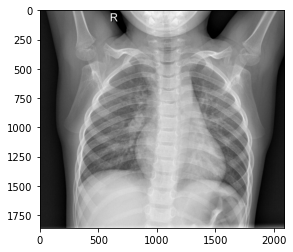

In [11]:
plt.imshow(img)
plt.show()

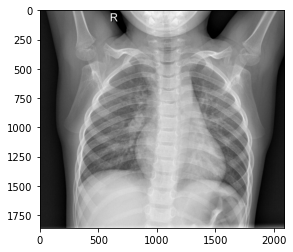

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

# 3. Load Data

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=50)

Found 2716 files belonging to 2 classes.


In [15]:
1341+1375

2716

In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

In [18]:
batch

(array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

In [19]:
len(batch)

2

In [20]:
batch[0].shape

(50, 256, 256, 3)

In [21]:
# class 0 = NORMAL
# class 1 = PNEUMONIA

batch[1]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0])

In [22]:
data.class_names

['NORMAL', 'PNEUMONIA']

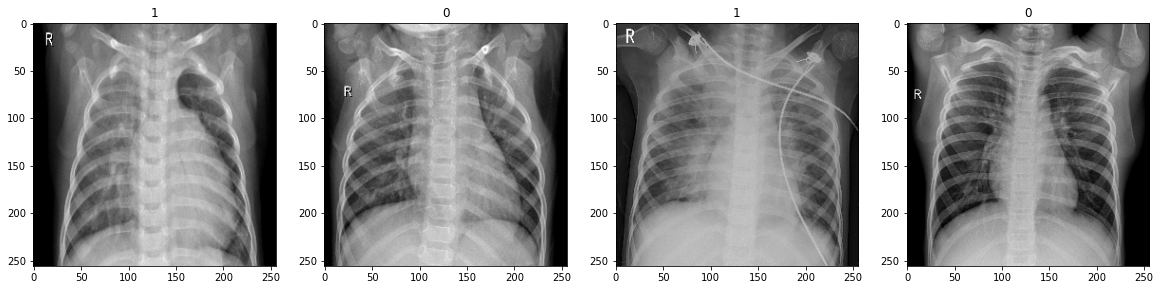

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [24]:
batch[0].min()

0.0

In [25]:
batch[0].max()

255.0

In [26]:
scaled = batch[0]/255

In [27]:
scaled.max()

1.0

In [28]:
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [29]:
data.as_numpy_iterator().next()

(array([[[[0.29908088, 0.29908088, 0.29908088],
          [0.2882353 , 0.2882353 , 0.2882353 ],
          [0.27987993, 0.27987993, 0.27987993],
          ...,
          [0.60400486, 0.60400486, 0.60400486],
          [0.6097379 , 0.6097379 , 0.6097379 ],
          [0.5945064 , 0.5945064 , 0.5945064 ]],
 
         [[0.30220494, 0.30220494, 0.30220494],
          [0.2942402 , 0.2942402 , 0.2942402 ],
          [0.2889141 , 0.2889141 , 0.2889141 ],
          ...,
          [0.5896494 , 0.5896494 , 0.5896494 ],
          [0.6126752 , 0.6126752 , 0.6126752 ],
          [0.6178328 , 0.6178328 , 0.6178328 ]],
 
         [[0.29675245, 0.29675245, 0.29675245],
          [0.29283088, 0.29283088, 0.29283088],
          [0.28890932, 0.28890932, 0.28890932],
          ...,
          [0.58415574, 0.58415574, 0.58415574],
          [0.6296952 , 0.6296952 , 0.6296952 ],
          [0.6285836 , 0.6285836 , 0.6285836 ]],
 
         ...,
 
         [[0.0036152 , 0.0036152 , 0.0036152 ],
          [0.00501

In [30]:
data.as_numpy_iterator().next()[0].min()

0.0

In [31]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [32]:
len(data)

55

In [37]:
train_size = int(len(data)*0.8)+1
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.1)

In [38]:
train_size, val_size, test_size

(45, 5, 5)

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [45]:
logdir = 'logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
45/45 [==============================] - 109s 2s/step - loss: 0.4142 - accuracy: 0.8000 - val_loss: 0.1657 - val_accuracy: 0.9400
Epoch 2/20
45/45 [==============================] - 108s 2s/step - loss: 0.1507 - accuracy: 0.9440 - val_loss: 0.1010 - val_accuracy: 0.9600
Epoch 3/20
45/45 [==============================] - 108s 2s/step - loss: 0.1234 - accuracy: 0.9604 - val_loss: 0.0780 - val_accuracy: 0.9800
Epoch 4/20
45/45 [==============================] - 107s 2s/step - loss: 0.0799 - accuracy: 0.9733 - val_loss: 0.0698 - val_accuracy: 0.9800
Epoch 5/20
45/45 [==============================] - 106s 2s/step - loss: 0.0640 - accuracy: 0.9764 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 6/20
45/45 [==============================] - 106s 2s/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0484 - val_accuracy: 0.9800
Epoch 7/20
45/45 [==============================] - 101s 2s/step - loss: 0.0340 - accuracy: 0.9907 - val_loss: 0.0598 - val_accuracy: 0.9840
Epoch 8/20
45

In [48]:
hist

In [49]:
hist.history

{'loss': [0.41416841745376587,
  0.15071377158164978,
  0.12340858578681946,
  0.07991885393857956,
  0.06398423761129379,
  0.05032365769147873,
  0.03401005268096924,
  0.025388078764081,
  0.012781206518411636,
  0.012134471908211708,
  0.007775988895446062,
  0.01881888322532177,
  0.022918684408068657,
  0.015591118484735489,
  0.009329244494438171,
  0.003634549444541335,
  0.008948837406933308,
  0.004994116257876158,
  0.002040091436356306,
  0.0008524773875251412],
 'accuracy': [0.800000011920929,
  0.9440000057220459,
  0.960444450378418,
  0.9733333587646484,
  0.9764444231987,
  0.984000027179718,
  0.9906666874885559,
  0.9897778034210205,
  0.9968888759613037,
  0.9973333477973938,
  0.9991111159324646,
  0.9933333396911621,
  0.9906666874885559,
  0.9951111078262329,
  0.9968888759613037,
  0.9991111159324646,
  0.9977777600288391,
  0.9986666440963745,
  0.9995555281639099,
  1.0],
 'val_loss': [0.16572320461273193,
  0.10104165971279144,
  0.07800029218196869,
  0.0697

# 8. Plot Performance

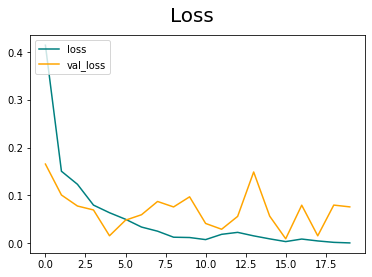

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

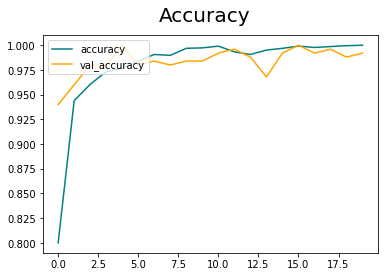

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [76]:
len(test)

5

In [77]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 195ms/step


In [78]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9848485, shape=(), dtype=float32) tf.Tensor(0.9930556, shape=(), dtype=float32)


In [79]:
yhat=[]
y_true = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true = y_true + y.tolist()
    yhat = yhat+[1 if element>0.5 else 0 for element in model.predict(X)]

1/1 [==============================] - 0s 203ms/step


In [80]:
y_pred = np.array(yhat)
y_test = np.array(y_true)

In [81]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [82]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [83]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.99      0.99      0.99       108

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



#### See we are gettting 99% accuracy on test data that is great

# 10. Test

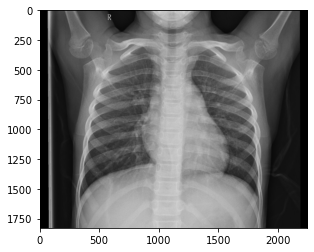

In [84]:
img = cv2.imread('data/test/NORMAL/NORMAL2-IM-0110-0001.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

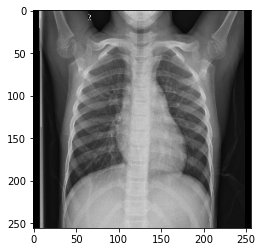

In [85]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 78ms/step


In [87]:
yhat

array([[0.00071407]], dtype=float32)

In [88]:
if yhat > 0.5: 
    print(f'Predicted class is PNEUMONIA')
else:
    print(f'Predicted class is NORMAL')

Predicted class is NORMAL


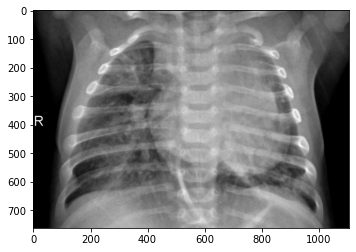

In [12]:
img = cv2.imread('data/test/PNEUMONIA/person100_bacteria_475.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

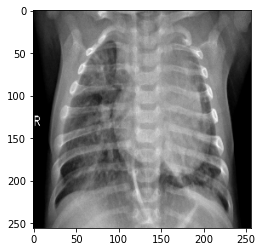

In [13]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [14]:
yhat = model.predict(np.expand_dims(resize/255,0))

NameError: name 'model' is not defined

In [15]:
yhat

NameError: name 'yhat' is not defined

In [16]:
if yhat > 0.5: 
    print(f'Predicted class is PNEUMONIA')
else:
    print(f'Predicted class is NORMAL')

NameError: name 'yhat' is not defined

# 11. Save the Model

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model.save(os.path.join('models','PNEUMONIA_classifier.h5'))

NameError: name 'model' is not defined

In [19]:
new_model = load_model(os.path.join('models','PNEUMONIA_classifier.h5'))

In [20]:
new_model

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [22]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 378ms/step


In [24]:
type(yhat_new)

numpy.ndarray

In [25]:
yhat_new.shape

(1, 1)

In [30]:
yhat_new[0][0]

0.9999988

In [23]:
if yhat_new > 0.5: 
    print(f'Predicted class is PNEUMONIA')
else:
    print(f'Predicted class is NORMAL')

Predicted class is PNEUMONIA


In [32]:
["PNEUMONIA" if element>0.5 else "NORMAL" for element in yhat_new]

['PNEUMONIA']

In [33]:
yhat_new

array([[0.9999988]], dtype=float32)